# **11. Continuous Random Variable 1**

**Outline**

1. Review Continuous Random Variables 1
2. Case 1 - Kedatangan Bus
3. Case 2 - Berat Domba

In [1]:
# Basic imports
import sys
sys.path.insert(0, "/home/ubuntu/learning/probability-and-random-variables/")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon

from probs_module.module_proba_11 import playground_distribusi_eksponensial
from probs_module.module_proba_11 import playground_distribusi_normal
from probs_module.module_proba_11 import tabel_distribusi_normal_standar

## **Review Topik**
---

Dari materi yang sudah dipelajari di video:
- Kita bisa menggunakan peluang dari probability density function dalam variable random continue
- Kita bisa menggunakan CDF dalam mencari peluang kumulatif variabel random continu
- Kita bisa mendapatkan nilai ekspektasi dan varians dari variabel random continu
- Kita mengenal distribusi eksponensial dan distribusi normal untuk sebuah permasalahan

## **Case Stude 1: Kedatangan Bus**
___

- Variabel Random Continue
- PDF
- CDF
- Ekspektasi
- Varians
- Distribusi Eksponensial

Alif melakukan pemodelan terhadap **waktu antar kedatangan bus**. Ia memperhatikan jadwal bus di halte A dalam periode waktu jam 8 pagi sampai jam 8 malam (12 jam) di Hari Senin. Selama observasi, terdapat 48 bus yang datang dalam waktu tersebut. Didapatkan data waktu kedatangan bus (dalam jam) terdapat pada variabel `points_in_time`

Catatan: bus pertama datang pada 0.72 jam setelah jam 8 pagi, untuk bus kedua datang 1.11 jam setelah jam 8 pagi, dan begitu seterusnya.

In [2]:
np.random.seed(123)
t = 12
n_obs = 48
points_in_time = np.round(np.random.uniform(0, t, n_obs),2)
points_in_time = np.sort(points_in_time)
points_in_time

array([ 0.72,  1.11,  1.39,  2.11,  2.19,  2.72,  2.74,  3.01,  3.43,
        3.52,  3.75,  3.81,  3.88,  4.12,  4.34,  4.71,  4.78,  4.98,
        5.08,  5.11,  5.12,  5.17,  5.2 ,  5.26,  5.77,  5.8 ,  5.92,
        6.02,  6.38,  6.38,  6.62,  7.33,  7.49,  7.57,  7.61,  8.22,
        8.36,  8.63,  8.67,  8.69,  8.75,  8.86, 10.19, 10.4 , 10.72,
       11.33, 11.77, 11.83])

### Pertanyaan 1.
Bagaimana data dari waktu antar kedatangan bus?

Waktu antar kedatangan bus adalah selisih antara kedatangan 2 bus atau dengan persamaan

$$diff = W_{t+1} - W_{t}$$

In [3]:
diff = points_in_time[1:] - points_in_time[:-1] 
diff

array([0.39, 0.28, 0.72, 0.08, 0.53, 0.02, 0.27, 0.42, 0.09, 0.23, 0.06,
       0.07, 0.24, 0.22, 0.37, 0.07, 0.2 , 0.1 , 0.03, 0.01, 0.05, 0.03,
       0.06, 0.51, 0.03, 0.12, 0.1 , 0.36, 0.  , 0.24, 0.71, 0.16, 0.08,
       0.04, 0.61, 0.14, 0.27, 0.04, 0.02, 0.06, 0.11, 1.33, 0.21, 0.32,
       0.61, 0.44, 0.06])

Waktu antar kedatangan bus inilah yang merupakan **variabel random** yang digunakan dalam kasus ini

### Pertanyaan 2.
Tampilkan plot histogram dari waktu antar kedatangan bus.

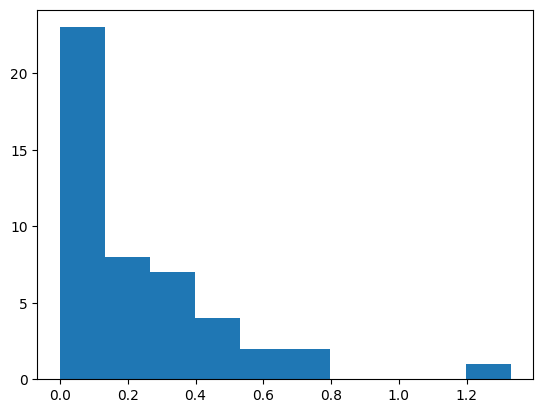

In [4]:
plt.hist(diff)
plt.show()

Dapat terlihat bahwa grafik histogram mendekati grafik PDF dari distribusi eksponensial. Sehingga kita dapat melakukan pemodelan dengan pendekatan distribusi eksponensial

### Pertanyaan 3.
3.1 Jika waktu antar kedatangan bus berdistribusi eksponensial, maka berapakah nilai $λ$-nya?

Nilai lambda diketahui bahwa terdapat 48 bus yang datang dari 12 jam, sehingga mendapatkan nilai rata-rata 4 bus per jam. Sehingga nilai lambda adalah 4.

In [5]:
lambd = 4
lambd

4

3.2 Gambarkan plot PDF distribusi eksponensial dengan lambda yang sudah didapatkan

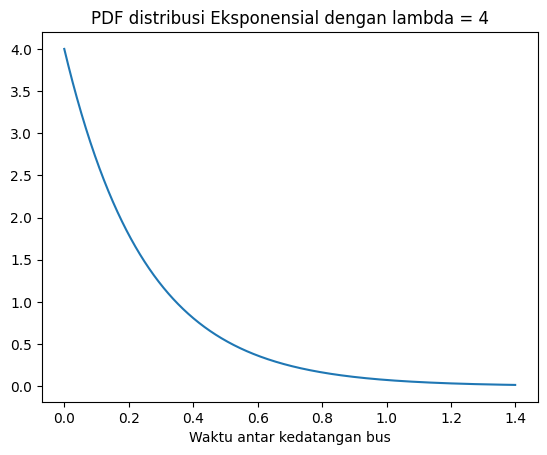

In [6]:
#fungsi pdf eksponensial
def pdf_exponential(x, lambd):
    return lambd * np.exp(-lambd * x)

#plot pdf eksponensial
x_axis = np.arange(0, 1.4, 0.001)
y_axis = pdf_exponential(x_axis, lambd)
plt.plot(x_axis, y_axis)
plt.xlabel("Waktu antar kedatangan bus")
plt.title('PDF distribusi Eksponensial dengan lambda = '+str(lambd))
plt.show()

### Pertanyaan 4.
Berapa nilai ekspektasi dan varians dari waktu antar kedatangan bus?

In [7]:
Ex = 1/lambd
Var = 1/(lambd^2)
print('Ekspektasi:', Ex)
print('Varians   :', Var)

Ekspektasi: 0.25
Varians   : 0.16666666666666666


### Pertanyaan 5.
Berapakah peluang sebuah bus datang 15 menit setelah bus sebelumnya?

In [8]:
x = 15/60
P = 1-np.exp(-lambd * x)
P

np.float64(0.6321205588285577)

In [9]:
# dengan cara lain
x = 15/60
mean = Ex

from scipy.stats import expon
expon.cdf(x=x, scale=mean)

np.float64(0.6321205588285577)

### Pertanyaan 6.
Seseorang datang di jam 12.10, ternyata bus sebelumnya sudah berangkat terlebih dahulu di jam 12.00. Berapa peluang kedatangan bus jika dia menunggu hingga pukul 13.00?

In [10]:
#Waktu antar bus dengan orang tersebut datang adalah 10 menit
x1 = 10/60

#Waktu antar kedatangan bus adalah 15 menit
x2 = 60/60

#Peluang menunggu
P1 = expon.cdf(x=x1, scale=mean)
P2 = expon.cdf(x=x2, scale=mean)
P = P2 - P1
P

np.float64(0.4951014801438578)

### Pertanyaan 7.

Jika sebuah bus berangkat pada pukul 15.00, dengan peluang 80% pukul berapa bus selanjutnya datang?

In [11]:
P = 0.8
#P = 1-np.exp(-lambd * x)
x = np.log(1-P)/-lambd
x*60

np.float64(24.14156868651151)

Sehingga kemungkinan 80%, bus selanjutnya datang pada pukul 15.24

## **Case Stude 2: Berat domba**
___

- Distribusi Normal

Dimisalkan di suatu peternakan domba, diambil sampel sebanyak 200 domba. Keseluruhan domba yang terpilih diukur beratnya, sehingga didapatkan berat sebagai berikut.

In [12]:
#make this example reproducible
np.random.seed(123)
#generate sample of 100 values that follow a normal distribution 
berat_domba = np.random.normal(loc=25, scale=5, size=200)
berat_domba

array([19.57184698, 29.98672723, 26.41489249, 17.46852643, 22.10699874,
       33.25718269, 12.86660378, 22.85543686, 31.32968129, 20.66629799,
       21.60556924, 24.52645516, 32.45694813, 21.80549002, 22.7800902 ,
       22.82824362, 36.02965041, 35.93393044, 30.02026949, 26.930932  ,
       28.68684288, 32.45366014, 20.32083066, 30.87914522, 18.73059666,
       21.81124249, 29.53552598, 17.8565965 , 24.2996564 , 20.69122552,
       23.72190315, 11.00705447, 16.14233448, 21.50061383, 29.63731216,
       24.13182159, 25.01422958, 28.44111356, 20.60231828, 26.41813662,
       20.97316741, 16.36165253, 23.04550103, 27.86902931, 26.69294525,
       24.94084753, 36.96182633, 27.0645608 , 29.89368003, 36.19071669,
       18.52957338, 19.80605895, 33.71856113, 21.00968632, 25.14841615,
       30.34657985, 29.45353196, 33.77443091, 32.47822069, 30.34696335,
       21.13645643, 28.97431334, 26.57135997, 18.3686727 , 32.08649523,
       29.03618267, 25.2274504 , 23.8345397 , 19.00849428, 25.99

### Pertanyaan 1.
Lakukan plot histogram dari data tersebut.

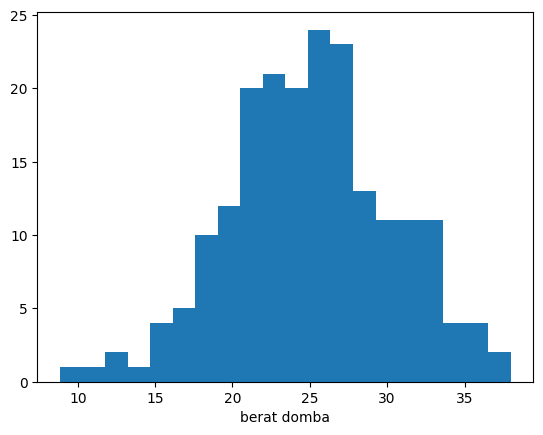

In [13]:
plt.hist(berat_domba, bins=20)
plt.xlabel("berat domba")
plt.show()

Hasil plot histogram

### Pertanyaan 2.
Berapa nilai rata-rata dan varians dari 200 berat domba?

In [14]:
mean = berat_domba.mean()
var  = berat_domba.var()

#bulatkan
mean = np.round(mean,0)
var = np.round(var,0)
print('mean:',mean, ', var:',var)

mean: 25.0 , var: 28.0


### Pertanyaan 3.
Bagaimana plot PDF distribusi normal dengan mean dan varians yang telah didapatkan?

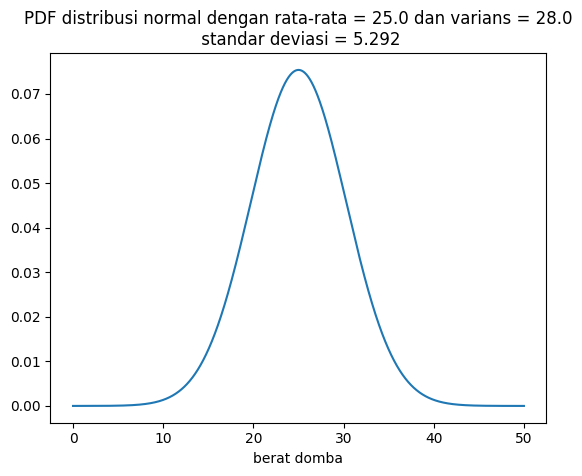

In [15]:
def pdf_normal(x, mu, var):
    return (1 / np.sqrt(2 * np.pi * var)) *\
        np.exp(-(1 / (2 * var)) * (x - mu) ** 2)

x_axis = np.arange(0, 50, 0.01)
y_axis = pdf_normal(x_axis, mean, var)
plt.plot(x_axis, y_axis)
#plt.ylim(0,0.6)
plt.xlabel("berat domba")
plt.title('PDF distribusi normal dengan rata-rata = '+str(mean)+' dan varians = '+str(var)+'\n standar deviasi = ' + str(np.round(np.sqrt(var),3)))
plt.show()

### Pertanyaan 4.
Berapa peluang seekor domba memiliki berat badan kurang dari 25 kg?

In [16]:
from scipy.stats import norm

#First solution:
#menormalisasi nilai X dengan mengurangi dengan mean dan dibagi dengan standar deviasinya
x = 25
std = np.sqrt(var)
X = (x-mean)/std
P1 = norm.cdf(X,0,1)
print('first solution:',P1)

#Second solution
#memasukkan nilai mean dan akar varians pada norm.cdf
x = 25
std = np.sqrt(var)
P2 = norm.cdf(x, mean, std)
print('second solution:',P2)

first solution: 0.5
second solution: 0.5


Kedua solusi mendapatkan hasil yang sama. Perbedaannya *normalisasi* `(x-mean)/std` diharuskan untuk mengganti nilai mean dan varians menjadi `0 dan 1` atau mentransformasi menjadi *distribusi normal standar*

### Pertanyaan 5.
Berapa paluang seekor domba memiliki berat badan lebih dari 30 kg?

In [17]:
x = 30
P = 1-norm.cdf(x, mean, std)
print('peluang domba memiliki berat lebih dari 30 kg adalah',P)

peluang domba memiliki berat lebih dari 30 kg adalah 0.1723521110034788


### Pertanyaan 6.
Jika domba yang disembelih adalah yang memiliki berat diantara 20 hingga 35 kg, berapa peluang dari domba yang disembelih?

In [18]:
#mendapatkan peluang kurang dari 20 kg
x1 = 20
P1 = norm.cdf(x1, mean, std)

#mendapatkan peluang kurang dari 35 kg
x2 = 35
P2 = norm.cdf(x2, mean, std)

#men
P = P2-P1
print('peluang domba memiliki berat diantara 20 hingga 35 kg adalah',P)

peluang domba memiliki berat diantara 20 hingga 35 kg adalah 0.7982570283188418


### Pertanyaan 7.
Kurang dari berapa kg berat badan domba jika diketahui peluangnya sekitar 80%? 

In [19]:
#ditanyakan x nya
P = 0.8
x = norm.ppf(P, mean, std)
print('jika diketahui peluangnya sekitar 80% maka domba memiliki berat kurang dari',np.round(x,2),'kg')

jika diketahui peluangnya sekitar 80% maka domba memiliki berat kurang dari 29.45 kg


## **Case Stude 3: Simulasi PDF Distribusi Eksponensial dan Distribusi Normal**
___

- Distribusi Eksponensial
- Distribusi Normal

### Simulasi Distribusi Eksponensial
Distribusi eksponensial memiliki satu parameter yaitu lambda ($\lambda$) dimana memiliki fungsi PDF sebagai berikut.

$$
\text{Exp}(x; \lambda) =
\begin{cases}
\lambda e^{-\lambda x} & x \geq 0 \\\\
0 & x,lainnya
\end{cases}
$$

In [20]:
playground_distribusi_eksponensial()

Masukkan Nilai Lambda:


interactive(children=(SelectionSlider(continuous_update=False, description='mean:', index=10, options=(0.0, 0.…

### Simulasi Distribusi Normal

Distribusi Normal memiliki 2 parameter yaitu rata-rata ($\mu$) dan variance ($\sigma^2$) dimana memiliki fungsi PDF sebagai berikut.

$$
\mathcal{N}(x ; \mu,\,\sigma^{2}) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}
$$

In [21]:
playground_distribusi_normal()

Masukkan Nilai Rata-rata dan Varians:


interactive(children=(SelectionSlider(continuous_update=False, description='mean:', index=50, options=(-5.0, -…

### Tabel Distribusi Normal Standar

1. Tabel distribusi normal standar memerlukan nilai x yang berada diselang -4.0 hingga 4.0 yang menginformasikan peluang CDF kurang dari nilai x

In [22]:
tabel_distribusi_normal_standar()

Masukkan Nilai x:


interactive(children=(SelectionSlider(continuous_update=False, description='x:', index=400, options=(-4.0, -3.…

2. Jika diketahui nilai CDF terlebih dahulu lalu ditanyakan nilai x nya, maka dilakukan invers CDF